# EDA: ANÁLISIS EXPLORATORIO DE LA DATA PELÍCULAS

Indice

__________________________________________________________

1. **IMPORTACIÓN DE LIBRERÍAS**

In [1]:
#Importamos Librerías necesarias
import pandas as pd                 #Importamos Pandas
import numpy as np                  #Importamos numpy
import matplotlib.pyplot as plt     #Importamos matplotlib
import seaborn as sns               #Importamos seaborn

2. **CARGAMOS LA DATA**


In [2]:
# Carga de Información ussando pandas
data = pd.read_csv("movies_ETL.csv")            # Cargamos el archivo movies_ETL.csv en el dataframe data

C:\Users\user\AppData\Local\Temp\ipykernel_17948\111028288.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("movies_ETL.csv")


3. **VISUALIZAMOS LA DATA**

In [3]:
data.shape       #Revisamos las dimensiones del dataframe

(11024289, 18)

In [4]:
data.head(5)     # Miramos las 5 primeras filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,userId,score,date
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,minutos,543,5.0,2003-07-30
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,minutos,595,3.0,1996-08-13
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,minutos,611,3.0,2001-01-03
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,minutos,2523,3.5,2012-06-25
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,113,minutos,3082,4.0,2000-03-30


In [5]:
data.info()             # Miramos los tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   show_id        object 
 1   type           object 
 2   title          object 
 3   director       object 
 4   cast           object 
 5   country        object 
 6   date_added     object 
 7   release_year   int64  
 8   rating         object 
 9   duration       object 
 10  listed_in      object 
 11  description    object 
 12  id             object 
 13  duration_int   int64  
 14  duration_type  object 
 15  userId         int64  
 16  score          float64
 17  date           object 
dtypes: float64(1), int64(3), object(14)
memory usage: 1.5+ GB


In [6]:
data.describe()     # mostramos algunas estadísticas básicas de las variables numéricas

,release_year,duration_int,userId,score
count,1.102429e+07,1.102429e+07,1.102429e+07,1.102429e+07
mean,2.010819e+03,6.569939e+01,8.997251e+04,3.533455e+00
std,1.538663e+01,5.175968e+01,8.686601e+04,1.059692e+00
min,1.920000e+03,0.000000e+00,1.000000e+00,5.000000e-01
25%,2.010000e+03,3.000000e+00,2.855800e+04,3.000000e+00
50%,2.016000e+03,8.300000e+01,5.684300e+04,3.500000e+00
75%,2.019000e+03,1.010000e+02,1.168670e+05,4.000000e+00
max,2.021000e+03,6.010000e+02,2.708960e+05,5.000000e+00


4. **LIMPIEZA DE DATOS**

*4.1. Gestión de Nulos*

In [7]:
data.isnull().sum()         # Revisar valores faltantes o Nulos

show_id                0
type                   0
title                  0
director         3960615
cast             2550859
country          5510080
date_added       4577546
release_year           0
rating                 0
duration          231117
listed_in              0
description         1815
id                     0
duration_int           0
duration_type          0
userId                 0
score                  0
date                   0
dtype: int64

In [8]:
#Revisamos la composición de las columnas con valores nulos
print(data['director'].unique())      #Imprimimos los valores de la columna 'director'

['don mckellar' 'girish joshi' 'josh webber' ... 'chandra prakash dwivedi'
 'majid al ansari' 'mozez singh']


In [9]:
print(data['cast'].unique())      #Imprimimos los valores de la columna 'cast'

['brendan gleeson, taylor kitsch, gordon pinsent'
 'mahesh manjrekar, abhay mahajan, sachin khedekar'
 'tom sizemore, lorenzo lamas, robert lasardo, richard jones, yancey arias, noel gugliemi'
 ...
 'jesse eisenberg, woody harrelson, emma stone, abigail breslin, amber heard, bill murray, derek graf'
 'tim allen, courteney cox, chevy chase, kate mara, ryan newman, michael cassidy, spencer breslin, rip torn, kevin zegers'
 'vicky kaushal, sarah-jane dias, raaghav chanana, manish chaudhary, meghna malik, malkeet rauni, anita shabdish, chittaranjan tripathy']


In [10]:
print(data['country'].unique())      #Imprimimos los valores de la columna 'country'

['canada' 'india' 'united states' 'united kingdom' 'france' 'spain' nan
 'italy' 'united kingdom, france' 'united states, italy'
 'united states, india' 'united kingdom, united states'
 'united states, united kingdom, germany' 'japan'
 'china, united states, united kingdom'
 'denmark, united kingdom, czech republic, netherlands'
 'united states, ireland' 'united states, united kingdom, canada'
 'united kingdom, united states, india' 'united kingdom, india'
 'united states, china' 'canada, united states' 'united states, thailand'
 'brazil, united states, india' 'switzerland, india'
 'united kingdom, canada, united states' 'germany' 'australia' 'belgium'
 'chile, argentina, united states' 'mexico'
 'denmark, sweden, united states' 'netherlands'
 'united states, united kingdom' 'new zealand' 'united states, portugal'
 'united states, france' 'canada, united states, brazil'
 'france, united states' 'india, united states' 'india, sweden'
 'united kingdom, hungary, united states' 'czech repu

`*Profundizamos en Revisión de las columnas 'date_added' y 'release_year'*`

El objetivo de este ejecicio de profundización es calcular la diferencia de años entre la fecha de ingreso a la plataforma y la fecha de lanzamiento. Esta diferencia de años nos permitirá establecer una constante para completar los valores nulos en la columna 'date_added'

In [11]:
dif_anos_publicacion_lanzamiento=data        #Creamos el dataframe que nos permitirá encontrar algún tipo de relación entre 'date_added' y 'release_year'

In [12]:
dif_anos_publicacion_lanzamiento_sin_nulos= dif_anos_publicacion_lanzamiento.dropna(subset=['date_added'])    #Eliminamos los valores nulos para hacer estadística

In [13]:
dif_anos_publicacion_lanzamiento_sin_nulos.shape    #Revisamos las nuevas dimensiones

(6446743, 18)

In [14]:
print(dif_anos_publicacion_lanzamiento_sin_nulos['date_added'].dtype)       # Revisamos el tipo de dato

object


In [15]:
dif_anos_publicacion_lanzamiento_sin_nulos['date_added'] = pd.to_datetime(dif_anos_publicacion_lanzamiento_sin_nulos['date_added']) #Cambiamos el tipo de dato de la columna date_added a fecha
dif_anos_publicacion_lanzamiento_sin_nulos['date'] = pd.to_datetime(dif_anos_publicacion_lanzamiento_sin_nulos['date'])             #Cambiamos el tipo de dato de la columna date a fecha

C:\Users\user\AppData\Local\Temp\ipykernel_14988\4290881803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_anos_publicacion_lanzamiento_sin_nulos['date_added'] = pd.to_datetime(dif_anos_publicacion_lanzamiento_sin_nulos['date_added']) #Cambiamos el tipo de dato de la columna date_added a fecha
C:\Users\user\AppData\Local\Temp\ipykernel_14988\4290881803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_anos_publicacion_lanzamiento_sin_nulos['date'] = pd.to_datetime(dif_anos_publicacion_lanzami

In [16]:
print(dif_anos_publicacion_lanzamiento_sin_nulos['date_added'].dtype)   #Revisamos el nuevo tipo de dato
print(dif_anos_publicacion_lanzamiento_sin_nulos['date'].dtype)         #Revisamos el nuevo tipo de dato

datetime64[ns]
datetime64[ns]


In [17]:
dif_anos_publicacion_lanzamiento_sin_nulos['year_publicación_plataforma'] = dif_anos_publicacion_lanzamiento_sin_nulos['date_added'].dt.year    #Extraemos en una nueva columna el valor del año de la columna 'date_added'

C:\Users\user\AppData\Local\Temp\ipykernel_14988\2874002023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_anos_publicacion_lanzamiento_sin_nulos['year_publicación_plataforma'] = dif_anos_publicacion_lanzamiento_sin_nulos['date_added'].dt.year    #Extraemos en una nueva columna el valor del año de la columna 'date_added'


In [18]:
dif_anos_publicacion_lanzamiento_sin_nulos['dif_publicación_menos_lanzamiento']=dif_anos_publicacion_lanzamiento_sin_nulos['year_publicación_plataforma']-dif_anos_publicacion_lanzamiento_sin_nulos['release_year'] #Creamos una Columna que resta en la que se agregó al sistema - fecha de lanzamiento

C:\Users\user\AppData\Local\Temp\ipykernel_14988\1985043455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif_anos_publicacion_lanzamiento_sin_nulos['dif_publicación_menos_lanzamiento']=dif_anos_publicacion_lanzamiento_sin_nulos['year_publicación_plataforma']-dif_anos_publicacion_lanzamiento_sin_nulos['release_year'] #Creamos una Columna que resta en la que se agregó al sistema - fecha de lanzamiento


In [19]:
dif_anos_publicacion_lanzamiento_sin_nulos.describe()   #Mostramos las estdísticas

,release_year,duration_int,userId,score,year_publicación_plataforma,dif_publicación_menos_lanzamiento
count,6.446743e+06,6.446743e+06,6.446743e+06,6.446743e+06,6.446743e+06,6.446743e+06
mean,2.012663e+03,5.921644e+01,8.994467e+04,3.533938e+00,2.019084e+03,6.420424e+00
std,1.186633e+01,5.177319e+01,8.685771e+04,1.059837e+00,1.690596e+00,1.181716e+01
min,1.923000e+03,0.000000e+00,1.000000e+00,5.000000e-01,2.006000e+03,-3.000000e+00
25%,2.012000e+03,2.000000e+00,2.854000e+04,3.000000e+00,2.018000e+03,0.000000e+00
50%,2.017000e+03,7.800000e+01,5.683300e+04,3.500000e+00,2.019000e+03,2.000000e+00
75%,2.019000e+03,1.010000e+02,1.168470e+05,4.000000e+00,2.020000e+03,7.000000e+00
max,2.021000e+03,3.120000e+02,2.708960e+05,5.000000e+00,2.021000e+03,9.600000e+01


### `**Resultado: en este sentido le restaremos 6 años a los valores faltantes de la columna 'date_added' debido a que la media es de 6.4**`

`...fin de la profundización`

In [21]:
print(data['duration'].unique())      #Imprimimos los valores de la columna 'duration'

['113 min' '110 min' '74 min' '69 min' '45 min' '52 min' '98 min'
 '131 min' '87 min' '92 min' '88 min' '93 min' '94 min' '46 min' '96 min'
 '1 season' '104 min' '62 min' '50 min' '3 seasons' '2 seasons' '86 min'
 '36 min' '37 min' '103 min' '9 min' '18 min' '14 min' '20 min' '19 min'
 '22 min' '60 min' '6 min' '54 min' '5 min' '84 min' '126 min' '125 min'
 '109 min' '89 min' '85 min' '56 min' '40 min' '111 min' '33 min' '34 min'
 '95 min' '99 min' '78 min' '4 seasons' '77 min' '55 min' '53 min'
 '115 min' '58 min' '49 min' '135 min' '91 min' '64 min' '59 min' '48 min'
 '122 min' '90 min' '102 min' '65 min' '114 min' '136 min' '70 min'
 '138 min' '100 min' '480 min' '4 min' '30 min' '152 min' '68 min'
 '57 min' '7 seasons' '31 min' '151 min' '149 min' '9 seasons' '141 min'
 '121 min' '79 min' '140 min' '51 min' '106 min' '75 min' '27 min'
 '107 min' '108 min' '38 min' '157 min' '43 min' '118 min' '139 min'
 '6 seasons' '112 min' '15 min' '72 min' '5 seasons' '116 min' '142 min'
 '71 mi

In [22]:
print(data['description'].unique())      #Imprimimos los valores de la columna 'description'

["a small fishing village must procure a local doctor to secure a lucrative business contract. when unlikely candidate and big city doctor paul lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. as the doctor's time in the village winds to a close, acting mayor murray french has no choice but to pull out all the stops."
 'a metro family decides to fight a cyber criminal threatening their stability and pride.'
 'after a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction'
 ...
 'looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters.'
 'dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.'
 "a scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music an

In [23]:
print(data['duration_int'].unique())      #Imprimimos los valores de la columna 'duration_int' porque es dependiente de 'duration'

[113 110  74  69  45  52  98 131  87  92  88  93  94  46  96   1 104  62
  50   3   2  86  36  37 103   9  18  14  20  19  22  60   6  54   5  84
 126 125 109  89  85  56  40 111  33  34  95  99  78   4  77  55  53 115
  58  49 135  91  64  59  48 122  90 102  65 114 136  70 138 100 480  30
 152  68  57   7  31 151 149 141 121  79 140  51 106  75  27 107 108  38
 157  43 118 139 112  15  72 116 142  71  42  81  32  66 127 159  67  29
 132 101 164  73  61  80  83  44 120  26  97  23 105  82  11 148 161 123
   0 124 143  35  47 170 146 601  24  21 154 128 133 153 119  63 169 174
 144 137  76  39   8  12 134 163 145 162  41 147 155 117 167  28  25 180
 541 240 129 178 171 172 173  10 166 160 130 479  13  17  16 158 183 150
 481 181 156 540 177 550 485 176 193 165 175 188 187 168 190 185 209 192
 182 207 269 191 229 189 273 204 212 224 203 194 233 237 230 195 253 208
 186 312 214 179 200 196 228 205 201]


In [24]:
print(data['duration_type'].unique())      #Imprimimos los valores de la columna 'duration_type' porque es dependiente de 'duration'

['minutos' 'temporadas' '0']


In [3]:
# Reemplazamos los valores nulos
data['director'].fillna('sin_dato', inplace=True)           #Reemplazamos los valores Nulos con el término 'sin_dato' en en la Columna 'director'
data['cast'].fillna('sin_dato', inplace=True)               #Reemplazamos los valores Nulos con el término 'sin_dato' en en la Columna 'cast'
data['country'].fillna('sin_dato', inplace=True)            #Reemplazamos los valores Nulos con el término 'sin_dato' en en la Columna 'country'
data['date_added'] = data['date_added'].fillna(pd.to_datetime((data['release_year']+6).astype(str) + '-' + '1'+ '-' + '01'))    #Reemplazamos los valores Nulos de la columna 'date_added' con la fecha de estreno +6 días
data['duration'].fillna('sin_dato', inplace=True)           #Reemplazamos los valores Nulos con el término 'sin_dato' en en la Columna 'duration'
data['description'].fillna('sin_dato', inplace=True)        #Reemplazamos los valores Nulos con el término 'sin_dato' en en la Columna 'description'

In [26]:
data.isnull().sum()             # Volvemos a revisar valores faltantes o Nulos

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
id               0
duration_int     0
duration_type    0
userId           0
score            0
date             0
dtype: int64

*4.2. Gestión de Duplicados*

La premisa para eliminar duplicados es: **Un usuario no puede calificar varias veces la misma película y si lo hace nos quedaremos con la más calificación más atual**

In [5]:
#Eliminamos duplicados y nos quedamos con la última fecha
data = data.sort_values('date', ascending=False)    # ordenar los datos por la columna de fecha en orden descendente
data_aux = data.drop_duplicates(keep='first')       # eliminar filas duplicadas en función de la columna de fecha de score
data=data_aux                                       # Reemplazamos los valores del dataframe original por los nuevos
print(data_aux.shape)                               # Imprimir las dimensiones finales
duplicados_dup=data[data.duplicated()]              # Extraemos los duplicados
print(duplicados_dup.shape)                         # Imprimir la cantidad de duplicados finales


(11013825, 18)
(0, 18)


*4.3. Gestión de Valores inconsistentes*

In [6]:
#Cambiamos el formato de las columnas 'date_added' y 'date' a formato fecha
data['date_added'] = pd.to_datetime(data['date_added']) #Cambiamos el tipo de dato de la columna 'date_added' a formato fecha
data['date'] = pd.to_datetime(data['date'])             #Cambiamos el tipo de dato de la columna 'date' a formato fecha

In [ ]:
#Revisamos que los cambios de formato se hayan realizado correctamente
print(data['date_added'].dtype)   #Revisamos el nuevo tipo de dato
print(data['date'].dtype)         #Revisamos el nuevo tipo de dato

datetime64[ns]
datetime64[ns]


In [ ]:
#Creamos una columna de nombre plataforma para distinguir mejor la plataforma consultada
data['plataforma'] = data['id'].str.get(0)                          #Extraemos la primera letra de la columna 'id' y creamos una nueva columna 'plataforma'
data['plataforma'] = data['plataforma'].replace('a', 'amazon')      #Reemplazamos los datos de la columna 'plataforma' por el nombre ampliado 'amazon'
data['plataforma'] = data['plataforma'].replace('d', 'disney')      #Reemplazamos los datos de la columna 'plataforma' por el nombre ampliado 'disney'
data['plataforma'] = data['plataforma'].replace('h', 'hulu')        #Reemplazamos los datos de la columna 'plataforma' por el nombre ampliado 'hulu'
data['plataforma'] = data['plataforma'].replace('n', 'netflix')     #Reemplazamos los datos de la columna 'plataforma' por el nombre ampliado 'netflix'

`Otra informacion inconsistente es la fecha del rating por cada película, esta es inferior a la fecha de carga  a la plataforma, sin embargo se trabajará sobre esa data normalmente asumiendo que es un error de instrumento`

*4.4. Gestión de Outliers*

<AxesSubplot: xlabel='score'>

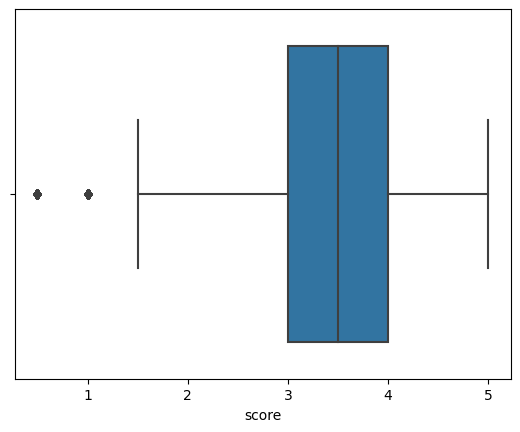

In [38]:
#Buscamos outliers
sns.boxplot(x=data['score'])      # Revisar los outliers mediante un gráfico boxplot

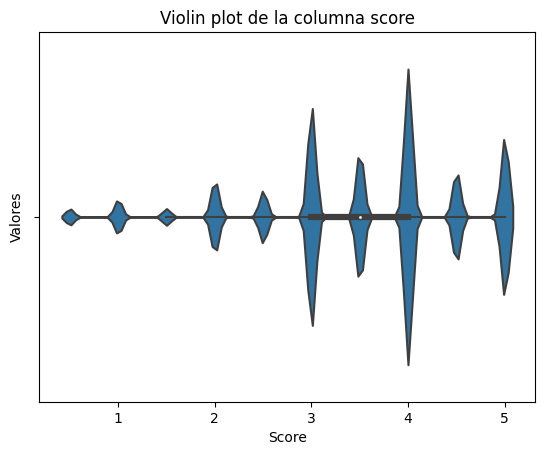

In [39]:
#Visualizamos la densidad de la data 
sns.violinplot(data=data, x='score')            #Declaramos la columna
plt.title('Violin plot de la columna score')    #Asignamos un titulo al gráfico
plt.xlabel('Score')                             #Asignamos un nombre al eje x
plt.ylabel('Valores')                           #Asignamos un nombre al eje y
plt.show()                                      #Mostramos el gráfico

`No Eliminamos los outliers de la columna 'score' porque es un comportamiento normal de la data, está dentro de los rangos`

5. **ANÁLISIS EXPLORATORIO**

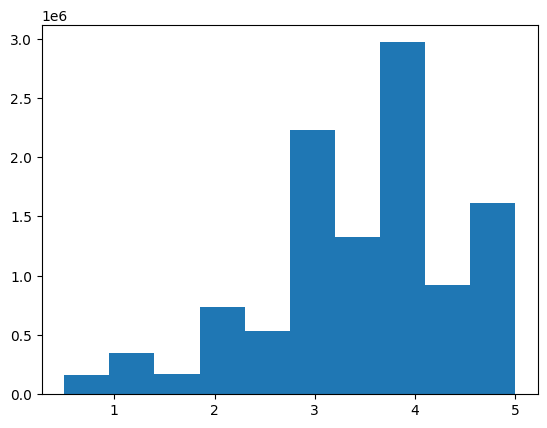

In [41]:
# Histograms
plt.hist(data['score'])
plt.show()



In [44]:
# Scatter plots
sns.scatterplot(x='plataforma', y='score', data=data)
sns.scatterplot(x='type', y='score', data=data)

`Todas las plataformas tienen calificacioes a lo largo de 0.5 y 5`

<AxesSubplot: xlabel='score', ylabel='count'>

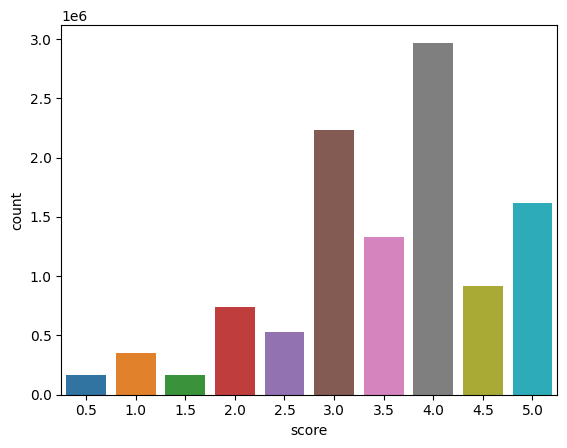

In [49]:
# Bar plots
sns.countplot(x='score', data=data)

`El score 4 y 3 acumulan más del 30% las puntuaciones`

In [50]:
# Correlation
sns.heatmap(data_so.corr(), annot=True)

`No existe ninguna variable numérica que tenga correlación con el score`

6. **ANÁLISIS PROFUNDO**

In [52]:
# Agrupamos y mostramos los 2 valores más altos por película
data_auxiliar=data
data_auxiliar['promedio_id'] = data_auxiliar.groupby('id')['score'].transform('mean')
sns.distplot(data_auxiliar['promedio_id'], kde=True, color='blue')

`El comportamiento del score con respecto al id de las películas sigue un comportamiento normal`

In [56]:
# Pivot Tables
data.pivot_table(values='score', index='type', columns='plataforma')

plataforma,amazon,disney,hulu,netflix
type,,,,
movie,3.532750,3.531689,3.534510,3.533897
tv show,3.532481,3.533425,3.534286,3.534745


`La puntuación promedio de todas las plataformas es identica en 3.5.`

In [57]:
# Cross-Tabulation
pd.crosstab(data['plataforma'], data['score'])

score,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
plataforma,,,,,,,,,,
amazon,68800,147144,70702,310974,222822,938794,558168,1246115,386422,677448
disney,10302,22236,10560,46878,33747,139911,83755,187198,58084,101521
hulu,21951,46823,22392,98356,70757,297513,177449,397510,122728,215911
netflix,62930,134182,63714,283323,202893,854858,509268,1137469,351835,620382


`Las plataformas con mayor puntuación de score=5 son netflix y amazon.`

7. **EXPORTAR DATA PARA MACHINE LEARNING**

In [8]:
# Preparamos el dataframe a exportar para machine learning
columnas_a_exportar = ['userId', 'id', 'score','title']     # Listar columnas a exportar
data_ml=data[columnas_a_exportar]                           # Creamos un dataframe solo con los datos a utilizar en machine learning
duplicados_ml=data_ml[data_ml.duplicated()]                 # Examinamos duplicados
duplicados_ml.shape                                         # Viualizamos la cantidad de duplicados

(18191, 4)

In [9]:
# Exportamos el dataframe
data_ml.to_csv('movies_etl_eda.csv', index=False)           # Exportar las columnas seleccionadas en archivo csv